# Stock Forecasting using statsmodels

### Autoregressions

https://www.statsmodels.org/stable/index.html  
https://github.com/statsmodels/statsmodels  


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^GSPC' # input
start = '2010-01-01' # input 
end = '2022-07-22'  # input
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-15,3818.000000,3863.620117,3817.179932,3863.159912,3863.159912,3537130000
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3830.850098,3414470000
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3936.689941,3160350000
2022-07-20,3935.320068,3974.129883,3922.030029,3959.899902,3959.899902,3452150000
2022-07-21,3955.469971,3999.290039,3927.639893,3998.949951,3998.949951,3586030000


In [5]:
df['Returns'] = df['Adj Close'].pct_change().dropna()

In [6]:
price = 100 * df['Returns'].resample('M').last()

In [7]:
price

Date
2010-01-31   -0.982917
2010-02-28    0.140538
2010-03-31   -0.327287
2010-04-30   -1.664768
2010-05-31   -1.237469
                ...   
2022-03-31   -1.565254
2022-04-30   -3.628451
2022-05-31   -0.627437
2022-06-30   -0.875928
2022-07-31    0.986137
Freq: M, Name: Returns, Length: 151, dtype: float64

In [8]:
price.shape

(151,)

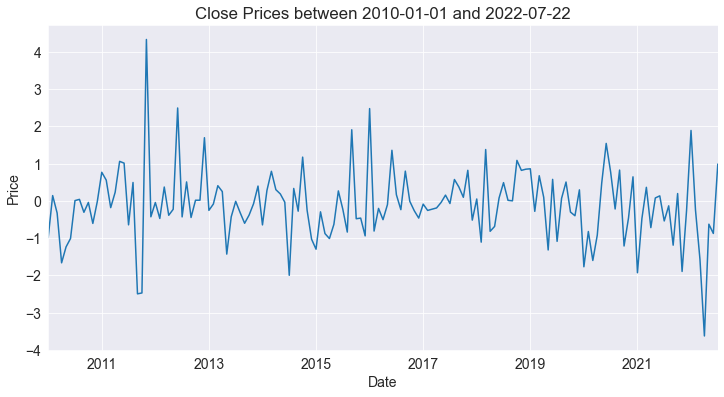

In [9]:
plt.figure(figsize = (12, 6))
plt.title('Close Prices between {} and {}'.format(
    start,
    end
))
price.plot()
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [10]:
mod = AutoReg(price, 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                Returns   No. Observations:                  151
Model:                     AutoReg(3)   Log Likelihood                -205.059
Method:               Conditional MLE   S.D. of innovations              0.967
Date:                Sat, 23 Jul 2022   AIC                              0.001
Time:                        20:39:03   BIC                              0.102
Sample:                    04-30-2010   HQIC                             0.042
                         - 07-31-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1223      0.081     -1.504      0.133      -0.282       0.037
Returns.L1    -0.0154      0.083     -0.187      0.852      -0.177       0.146
Returns.L2    -0.0398      0.083     -0.482      0.6

In [11]:
res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                Returns   No. Observations:                  151
Model:                     AutoReg(3)   Log Likelihood                -205.059
Method:               Conditional MLE   S.D. of innovations              0.967
Date:                Sat, 23 Jul 2022   AIC                              0.001
Time:                        20:39:03   BIC                              0.102
Sample:                    04-30-2010   HQIC                             0.042
                         - 07-31-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1223      0.074     -1.650      0.099      -0.268       0.023
Returns.L1    -0.0154      0.107     -0.145      0.885      -0.224       0.193
Returns.L2    -0.0398      0.099     -0.403      0.6

In [12]:
sel = ar_select_order(price, 20, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                Returns   No. Observations:                  151
Model:                     AutoReg(0)   Log Likelihood                -208.335
Method:               Conditional MLE   S.D. of innovations              0.962
Date:                Sat, 23 Jul 2022   AIC                             -0.052
Time:                        20:39:03   BIC                             -0.012
Sample:                    01-31-2010   HQIC                            -0.036
                         - 07-31-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1188      0.078     -1.519      0.129      -0.272       0.035


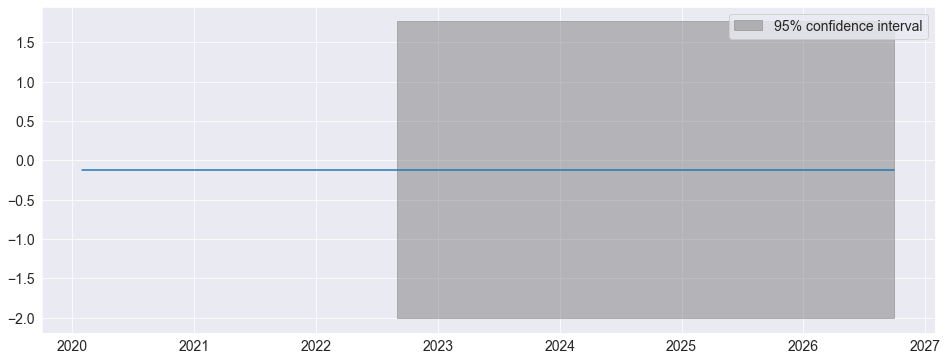

In [13]:
fig = res.plot_predict(120, 200)

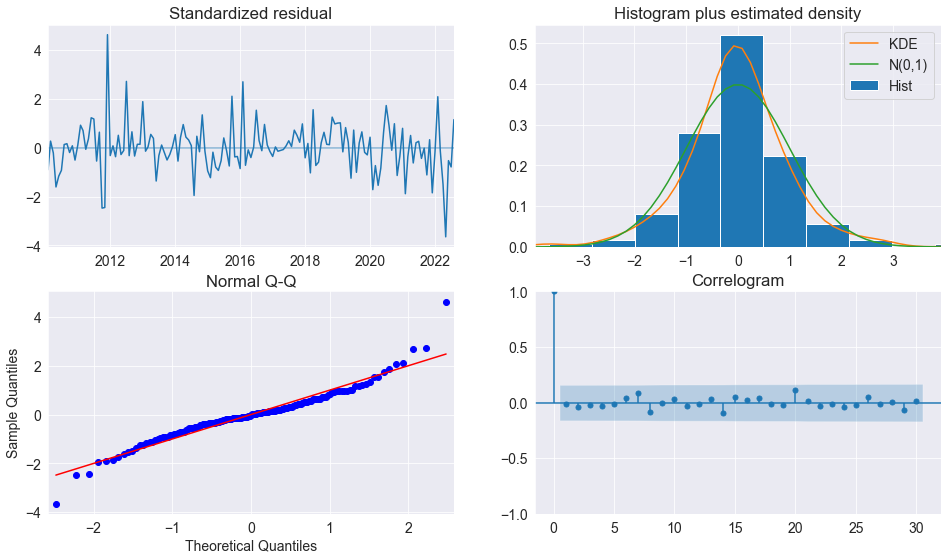

In [14]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)



In [15]:
sel = ar_select_order(price, 13, seasonal=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                Returns   No. Observations:                  151
Model:               Seas. AutoReg(0)   Log Likelihood                -202.529
Method:               Conditional MLE   S.D. of innovations              0.925
Date:                Sat, 23 Jul 2022   AIC                              0.017
Time:                        20:39:03   BIC                              0.277
Sample:                    01-31-2010   HQIC                             0.122
                         - 07-31-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0755      0.257     -0.294      0.769      -0.578       0.427
s(2,12)       -0.2234      0.363     -0.616      0.538      -0.935       0.488
s(3,12)       -0.0018      0.363     -0.005      0.9

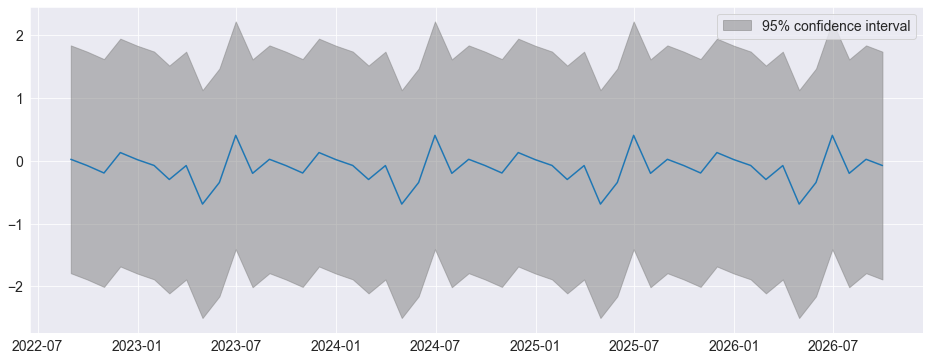

In [16]:
fig = res.plot_predict(151, 200)

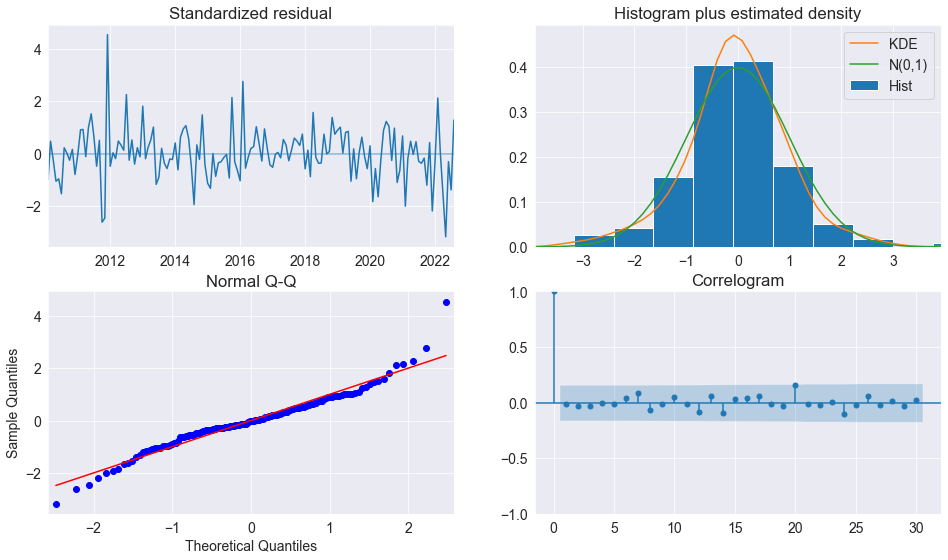

In [17]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(lags=30, fig=fig)
